In [181]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv")

percentile = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]

dataframe = data.groupby(["rank"])["salary"]
kurtosis_data = dataframe.apply(pd.Series.kurtosis)
skew_data = dataframe.apply(pd.Series.skew)
median_data = dataframe.apply(pd.Series.median)
coeffVar_data = dataframe.std() / dataframe.mean()
errorInMean_data = dataframe.apply(pd.Series.sem)
n_data = dataframe.count()
errorSkew_data = ((n_data*(n_data-1)*(n_data-2)) / ((n_data-3) * (n_data+1) * (n_data+3))) ** 0.5 * skew_data
errorKortosis_data = 2 * errorSkew_data * ((n_data**2-1)/((n_data-3)*(n_data+5)))**0.5
missingData = dataframe.apply(pd.Series.isnull)

summaryData = dataframe.describe(percentiles=percentile, include="all")
summaryData = summaryData.rename(columns={"kurtosis": "new_kurtosis"})
summaryData.insert(0, "new_kurtosis", kurtosis_data.values)
summaryData.insert(1, "std. error of kurtosis", errorKortosis_data)
summaryData.insert(0, "skewness", skew_data.values)
summaryData.insert(4, "median", median_data.values)
summaryData.insert(4, "std. error in mean", errorInMean_data.values)
summaryData.insert(2, "coefficient of variation", coeffVar_data.values)
summaryData.insert(1, "std. error of skewness", errorSkew_data)
summaryData.insert(1, "missing", missingData)
summaryData = summaryData.drop(columns="kurtosis", errors='ignore')
summaryData = summaryData.rename(columns={"new_kurtosis": "kurtosis"})
summaryData["valid"] = n_data

validData = summaryData.pop("valid")
summaryData.insert(0,"valid",validData)
summaryData["missing"] = 0
summaryData.transpose()

rank,AssocProf,AsstProf,Prof
valid,13.000000,19.000000,46.000000
skewness,-0.151200,0.030504,0.070309
missing,0.000000,0.000000,0.000000
std. error of skewness,-0.132338,0.027721,0.067428
kurtosis,-1.614149,-1.011154,0.201339
coefficient of variation,0.202331,0.115301,0.201014
std. error of kurtosis,-0.255702,0.053681,0.132436
count,13.000000,19.000000,46.000000
std. error in mean,5150.719625,2152.205275,3663.975052
median,103613.000000,78500.000000,123321.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CBBE0CAC8>,
      dtype=object)

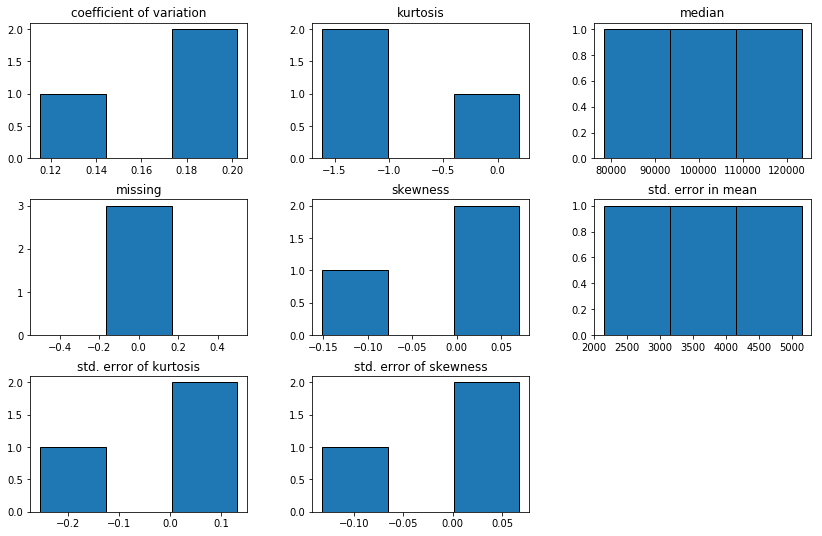

In [183]:
summaryData[["kurtosis","missing","std. error of skewness","coefficient of variation","std. error in mean","median","skewness","std. error of kurtosis"]].hist(figsize=(14,9),bins = 3,linewidth = 1,edgecolor = "k", grid=False)